In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [10]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Final Assignment

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# use yf to get the stock data
tsla = yf.Ticker("TSLA")

# Get the history stock price
tsla_share_price_data = tsla.history(period="1y")
tsla_share_price_data.reset_index(inplace=True)
tsla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-07-17 00:00:00-04:00,286.630005,292.230011,283.570007,290.380005,131569600,0.0,0.0
1,2023-07-18 00:00:00-04:00,290.149994,295.260010,286.010010,293.339996,112434700,0.0,0.0
2,2023-07-19 00:00:00-04:00,296.040009,299.290009,289.519989,291.260010,142355400,0.0,0.0
3,2023-07-20 00:00:00-04:00,279.559998,280.929993,261.200012,262.899994,175158300,0.0,0.0
4,2023-07-21 00:00:00-04:00,268.000000,268.000000,255.800003,260.019989,161050100,0.0,0.0


In [28]:
tsla_quarterly_financials = tsla.quarterly_financials
# print(tsla_quarterly_financials)
tesla_revenue = tsla_quarterly_financials.loc['Total Revenue'].T.reset_index()
tesla_revenue.columns = ['Date', 'Revenue']
print(tesla_revenue.tail())

        Date        Revenue
1 2023-12-31  25167000000.0
2 2023-09-30  23350000000.0
3 2023-06-30  24927000000.0
4 2023-03-31  23329000000.0
5 2022-12-31            NaN


In [20]:
# Get GME Stock price
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")

# reset index
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-07-17 00:00:00-04:00,22.879999,23.309999,22.700001,22.82,2026000,0.0,0.0
1,2023-07-18 00:00:00-04:00,22.719999,23.799999,22.680000,23.08,2345100,0.0,0.0
2,2023-07-19 00:00:00-04:00,23.420000,23.580000,22.959999,23.17,2250100,0.0,0.0
3,2023-07-20 00:00:00-04:00,23.010000,23.219999,22.660000,22.91,2256700,0.0,0.0
4,2023-07-21 00:00:00-04:00,23.049999,23.219999,22.160000,22.18,3134100,0.0,0.0


In [21]:
gme_quarterly_financials = gme.quarterly_financials
gme_revenue = gme_quarterly_financials.loc['Total Revenue'].T.reset_index()
gme_revenue.columns = ['Date', 'Revenue']
print(gme_revenue.tail())

        Date       Revenue
1 2023-10-31  1078300000.0
2 2023-07-31  1163800000.0
3 2023-04-30  1237100000.0
4 2023-01-31  2226400000.0
5 2022-10-31           NaN


In [29]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2024-07-16']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-07-16']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

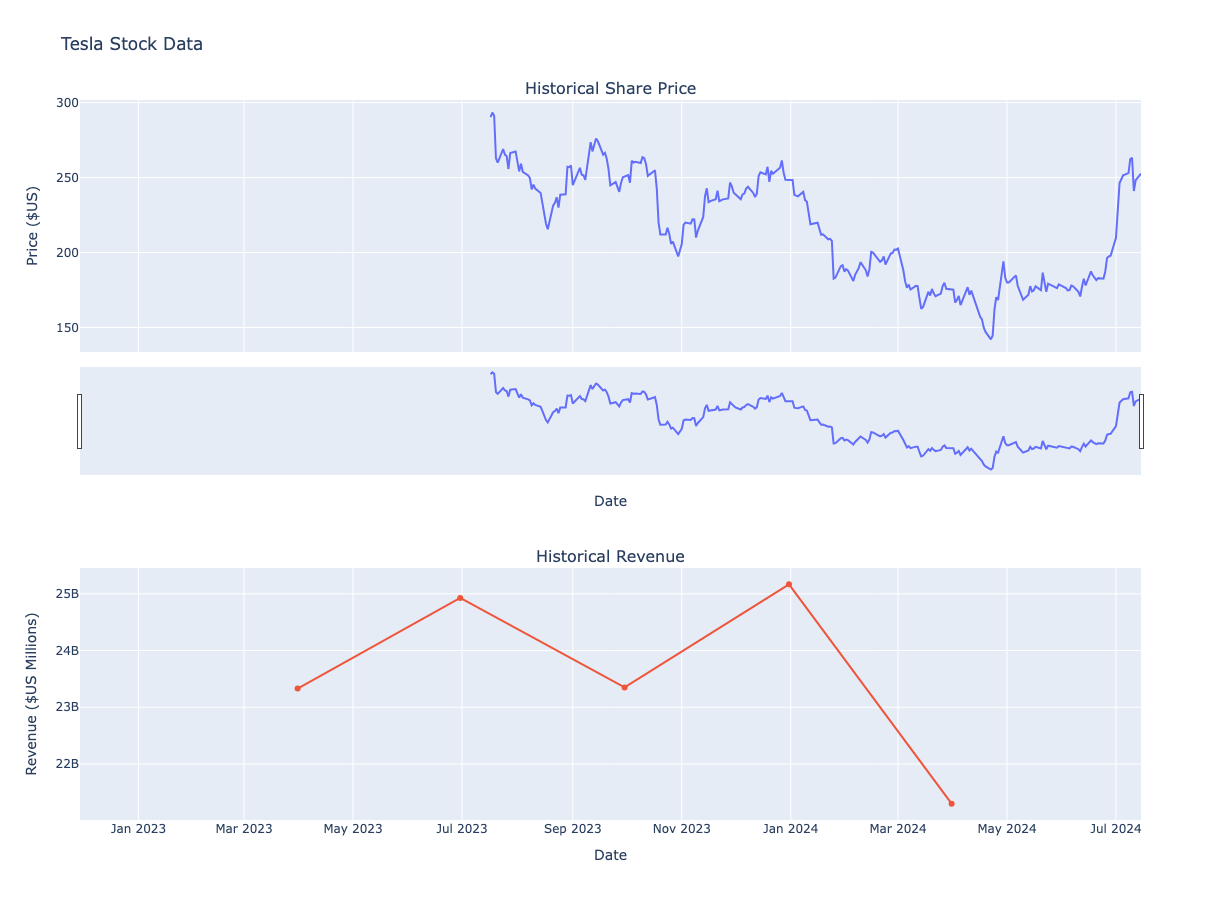

In [30]:
make_graph(tsla_share_price_data, tesla_revenue, 'Tesla Stock Data')

In [ ]:
make_graph(gme_data, gme_revenue, 'GME Stock Data')